
# NLP Essentials Project

# Sentiment Analysis Online Movie Reviews

### Project Scenario

In a recent [market research](https://newsroom.ibm.com/IBMs-Global-AI-Adoption-Index-2021?lnk=ushpv18ai3) by IBM, almost one-third of IT professionals surveyed globally say their business is using Artificial Intelligence (AI). The survey reported almost half of businesses today are now using applications powered by natural language processing (NLP).

NLP, specifically 'Sentiment Analysis', can provide a key business advantage by abstracting from unstructured text data the negative or positive attitude of the writer/author. This crucuial insight can help turn web data into market intelligence for the business. 

A request has been received from the web development department to add 'Sentiment Analysis' feature to a movie reviews page. 

The insights from the sentiment analysis will be used to promote more popular movies.  

In this project, you are tasked to create a prototype NLP project that is capable of 'Sentiment Analysis' from movie reviews. 

---


In this assignment, you will be working **individually** on the 'Sentiment Analysis' project. 

Complete ALL THE TASKS ( From 1 to 7). You may refer to online documentation (e.g. keras, pandas, etc) for help on syntax. 

`No copying of codes wholesale is allowed.`

Use a random_state = 42 where appropriate.

Broadly, this project will require the following steps:

1. Importing Various Modules.
2. Preparing The Data.
 
 2.1 Collect Relevant Data.

 2.2 Perform Image Preprocessing And Data Augementation. 
 
 2.3 Split it into train, validate, and test datasets.
 
 2.4 Normalize The Data.
 

3. Create The Model - Build a model based on convolutional neural network.

4. Train The Model.

5. Evaluate The Model.

6. Visualizing Predictions On Validation Set.
 6.1 Plot The Learning Curve And Confusion Matrix.





---



---



# **©** **Kenneth Foo. All rights reserved**

> AI Applications Student | NLP Graded Assignment

> **Honor Pledge for Graded Assignments**

> I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.

> *Signature:* 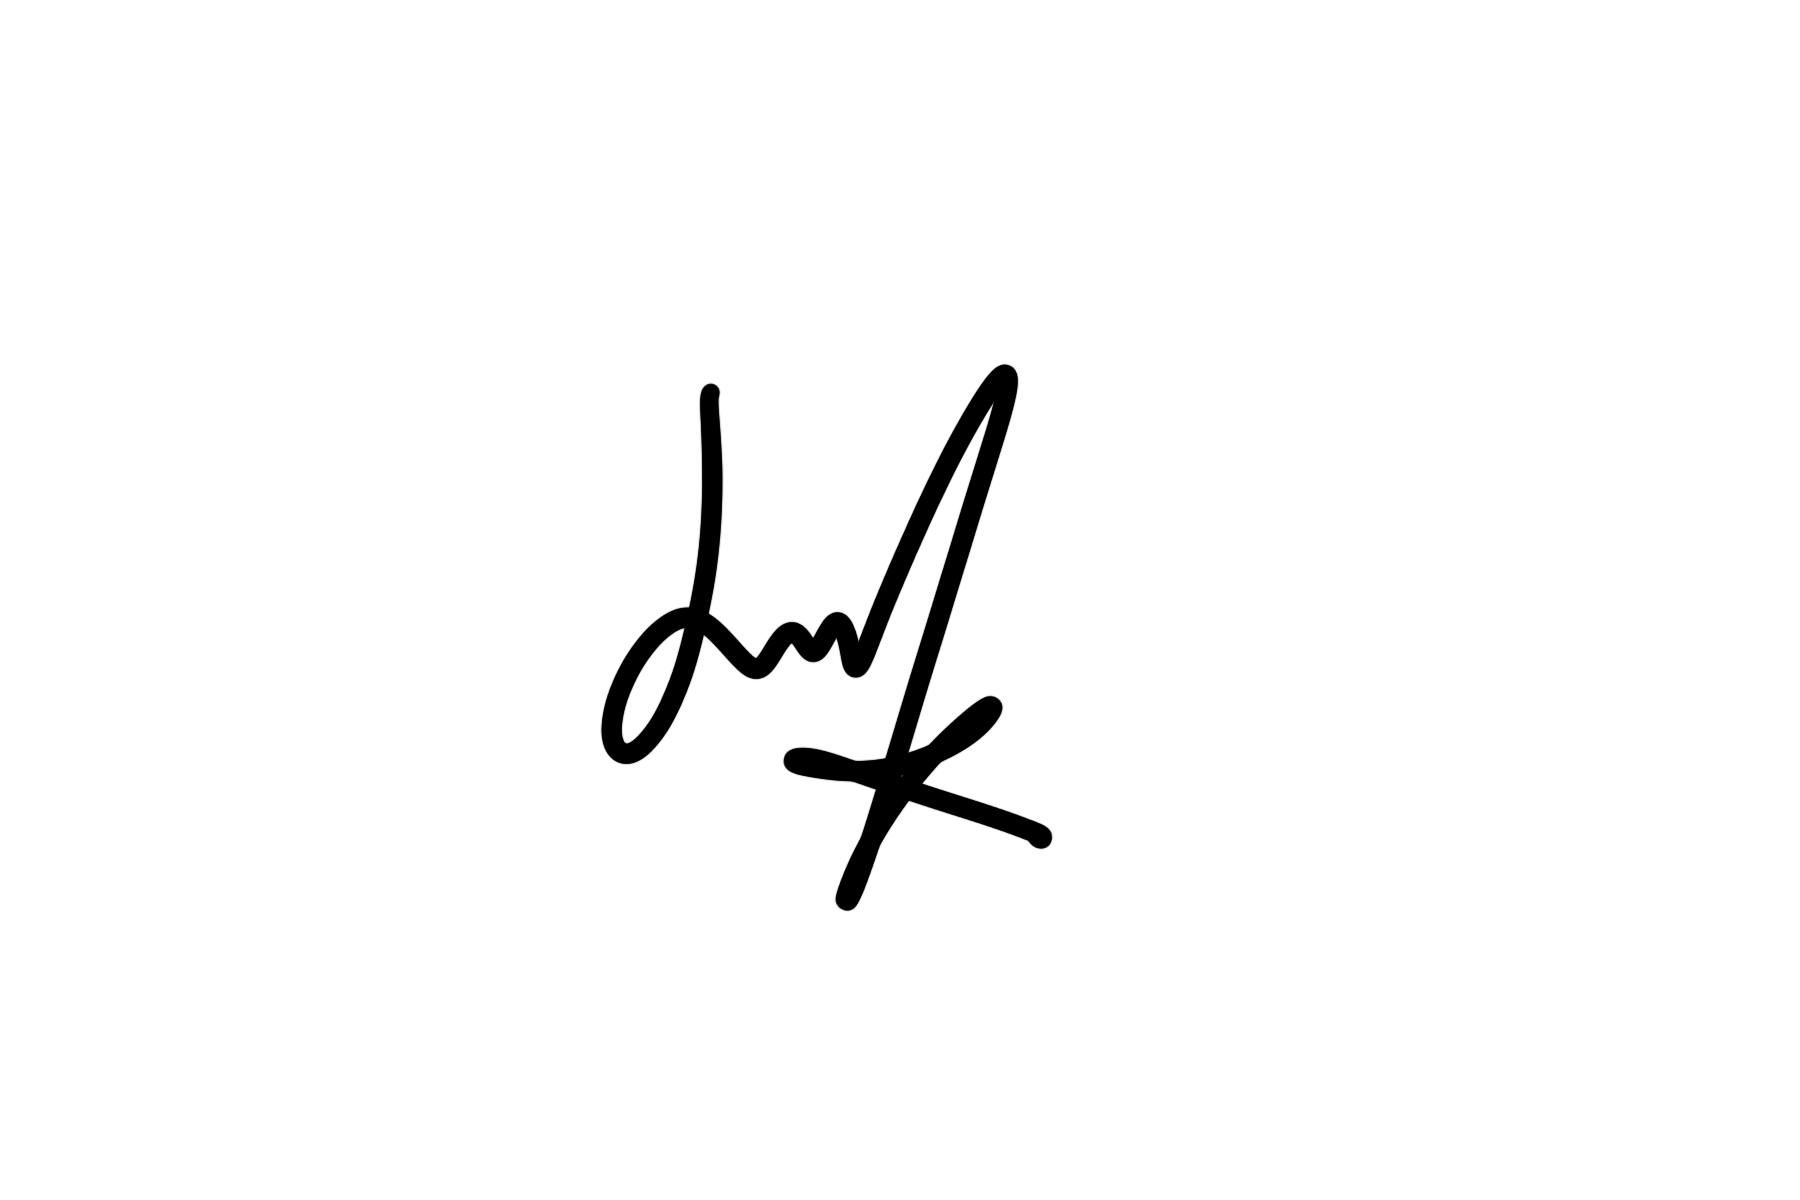













---



---



# Part 1 : Data loading and preliminary inspection

The data for this project will be from `polarity dataset 2.0` collected by [Bo Pang and colleagues from Cornell Univeristy](http://www.cs.cornell.edu/people/pabo/movie-review-data/). 

*(This dataset will be provided to you.)*

It was used for the paper published in 2002 called Thumbs up?
Sentiment Classification using Machine Learning Techniques, by Bo Pang, Lilian Lee, and Shivakumar Vaithyanathan.


Using google colab, load the given dataset according the folder structure.

In [47]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [48]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [49]:
path='/content/drive/MyDrive/ITE/NLP/Project/'

### Folder Structure
**Reminder**

In your google drive folder ensure you have the following directory structure set up:
```
Directory Structure In Google Drive:
MyDrive
|
+-- ITE
     |
     +--NLP
        |
        +--Project
          |
          +data
              |
              +--pos
              |
              +--neg
         
```            


## Task 1: Data Collection

Collect an additional 30 samples of positive reviews and 30 samples of negative reviews from this website:
https://www.rottentomatoes.com/browse/movies_in_theaters/sort:newest?page=1


Add these to the given dataset respectively. 

The final dataset should have 1000 positive reviews and 1000 negative reviews. 


In [50]:
# The following codes in this cell are provided as a guide. 

import os

def read_in(folder):
    files = os.listdir(folder)
    a_dict = {}
    for a_file in sorted(files):
        if not a_file.startswith("."):
            with open(folder + a_file, encoding='ISO-8859-1', errors ='ignore') as f:
                file_id = a_file.split(".")[0].strip()
                a_dict[file_id] = f.read()
            f.close()
    return a_dict

Print out the number of reviews in positive and negative dictionaries, as well as the very first positive and very first negative reviews in the dictionaries.

In [51]:
# The following codes in this cell are provided as a guide

folder=path+'data/'
pos_dict = read_in(folder + "pos/")
print(len(pos_dict))
#print(pos_dict.get(next(iter(pos_dict))))
neg_dict = read_in(folder + "neg/")
print(len(neg_dict))
#print(neg_dict.get(next(iter(neg_dict))))

1000
1000


## Task 2: Data Cleansing

Import the relevant NLTK libraries. 

In [52]:
# The following codes in this cell are provided as a guide

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Task 2.1 : Add More Stops Words To NLTK

Add the following to stopwords:
1. '@'
2. '#'
3. 'http'
4. ':'

In [53]:
stop = nltk.corpus.stopwords.words('english')
# Add a few more stop words we would like to remove here
##Complete the code below##
stop.append('@')
stop.append('#')
stop.append('http')
stop.append(':')
stop.append('!')
stop.append('%')
stop.append('^')
stop.append('*')
stop.append("'s")
stop.append('``')

### Task 2.1 : Process Text - Tokenize, Remove Punctuation, Lemmatize 

Complete the following functions.

In [54]:
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

# tokenize text using nltk.
def tokenize(text):
  # # Sentence tokenize
  sent_token = " ".join(sent_tokenize(text))
  # # Word tokenize
  word_token = word_tokenize(sent_token)
  
  return word_token


#remove punctuation from text using 'string.punctation'
def remove_punctuation(text):
  T = []
  # iterate through the words
  for word in text:
    # Check for non punctuation word
    if not word in string.punctuation:
      T.append(word)
  return T

def remove_stop_words(text):
  S = []
  for word in text:
    # Check for non stop words
    if not word in stop:
      S.append(word)

  return S



#lemmatize sentence using 'WordNetLemmatizer'
##Complete the code below##
def lemmatize(sentence):
  Lst = []
  wnl = WordNetLemmatizer()
  for word in sentence:
    l = wnl.lemmatize(word)
    Lst.append(l)

  return Lst


#-------------------------------------------------------------------------------------------------------

# Main
def process_text(text):
    tokenized_text=tokenize(text) # tokenize the text into tokens 
    removed_punctuation=remove_punctuation(tokenized_text) # for each token, remove punctuation
    removed_stopwords = remove_stop_words(removed_punctuation) # remove any stop words
    lemmas=lemmatize(removed_stopwords) # Perform lemmatisation on each token 
    
    return lemmas


In [55]:
# Test process text function
text = 'Come get these!NU@lls!!@#$%%^&*'
process_text(text)

['Come', 'get', 'NU', 'lls']

## Task 3: Randomly Combine Review Texts From Positive & Negative Reviews Data Sets. 

Preprocessed texts to remove punctuation, remove stop words andlemmatized the text.

Combine all these texts into a single dataset where each preprocessed review and its label are in a tuple: 

`data=[('preprocessed review text', label), ('preprocessed review text', label) ...]`

**Example:**

* ('this movie is nice', 1)
* ('this movie is lousy',0)

Label for positive and negative review:
* `Positive review is given 1.`
* `Negative review is given 0.`


In [56]:
import random
from tqdm.notebook import tqdm
import time
def prepare_data(pos_dict, neg_dict):
    data=[]
    originalText=[]
    
    # Iterate through the each pair in both of these dictionaries
    for pair in [pos_dict, neg_dict]:
        originalText.append(pair)
        
    # Iterate through each pair for positive dict
    for key, value in originalText[0].items():
        # pre-process the text
        processed_value_pos = process_text(value)
        data.append((processed_value_pos, 1))

    
      # Iterate through each pair for negative dict
    for key, value in originalText[1].items():
        # pre-process the text
        processed_value_neg = process_text(value)
        data.append((processed_value_neg, 0))


    random.seed(42)
    random.shuffle(data)
    texts = []
    labels = []
    for item in data:
        texts.append(item[0]) # pre-processed text
        labels.append(item[1]) # corresponding label


    return originalText,texts, labels, data
    #return data, texts, labels 
    


originalText,texts, labels, data = prepare_data(pos_dict, neg_dict) 


print(len(texts), len(labels))
#data




2000 2000


### Task 3.1 Split Dataset Into Train Test Sets.

Split the texts into:

1. 80% for training.
2. 20% for testing.

In [57]:
print(type(texts))
print(type(labels))
print(len(texts))
print(len(labels))

<class 'list'>
<class 'list'>
2000
2000


Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

# Train Test Split
def split(texts, labels, proportion):
  X_train, X_test, y_train, y_test = train_test_split(texts, labels, train_size=proportion, random_state=42)
  return X_train, X_test, y_train, y_test

# X_train    X_test        y_train       y_test
train_data, test_data, train_targets, test_targets = split(texts, labels, 0.8)

Pie chart of training & testing sets size

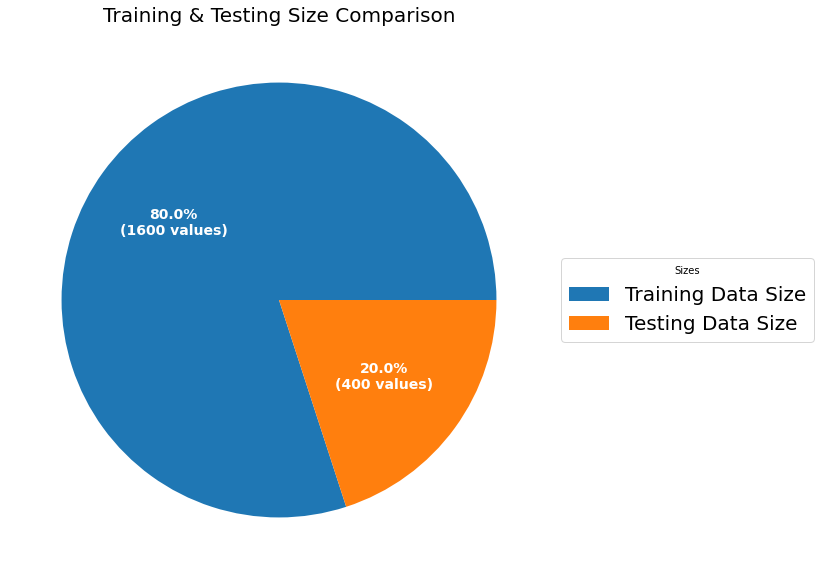

y_train size: 1600
y_test size: 400


In [59]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

values = [
    len(train_data),
    len(test_data)
]

names = [
    'Training Data Size',
    'Testing Data Size'
]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} values)".format(pct, absolute)


values, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),
                                  textprops=dict(color="w"))

ax.legend(values, names,
          title="Sizes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          prop={'size': 20}
          )

plt.setp(autotexts, size=14, weight="bold")

ax.set_title("Training & Testing Size Comparison", fontsize=20)

plt.show()
print(f'y_train size: {len(train_targets)}') 
print(f'y_test size: {len(test_targets)}')

# Perform Vectorisation and TF-IDF

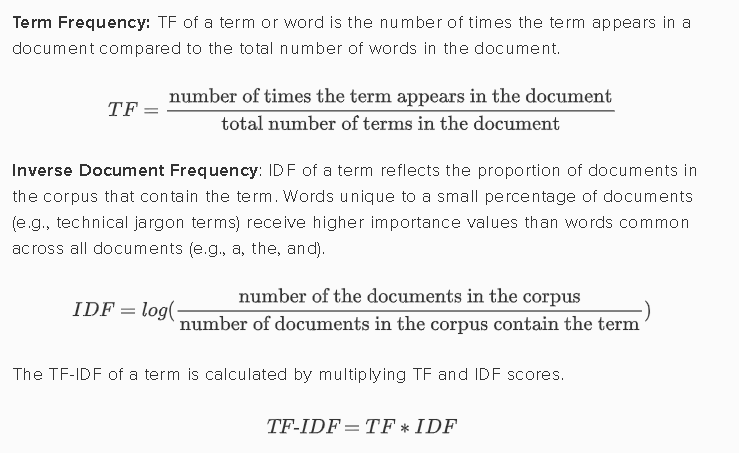

**Term Frequency Equation**
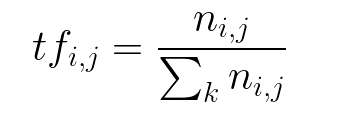

**Inverse Document Frequency Equation**
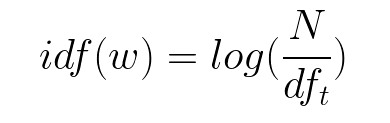

**TF * IDF**
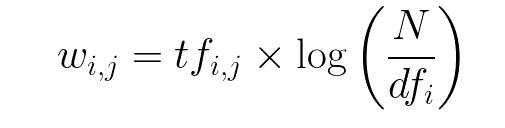



---



---



Note that I will be using **TfidfVectorizer** as it is equivalent to **CountVectorizer** followed by **Tfidftransformer**

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

**We want to limit the vocab to 500 but it could be changed by changing the max_features parameter**

Build the tfidfvectorizer function

**Be careful when building your vectorizer. Should fit_transform on the X_train then use transform on the X_test. The reason for not using fit_transform on X_test is because fit_transform chooses the best words from the data u provide. So even tho you may have 500 vocabs in total for X_train and X_test, using fit_transform(X_test) may result in the mis-alignment in the arrays(because the vocabs are different). We want to keep the same vectorizer and be a part of your model. If this is difficult to understand, you can think like this: The TFIDF function is sort of like a mother function, it gave birth to the vectorizer then you can use it subsequently.**

In [61]:
def TFIDF(train_data, test_data):
  vectorizer = TfidfVectorizer(analyzer = "word", strip_accents=None, tokenizer = None, \
                            preprocessor = None, stop_words = None, max_features = 500, lowercase=True, binary=True, smooth_idf = True, norm='l2')
  # Do fit_transfrom
  train_data_features = vectorizer.fit_transform([' '.join(x) for x in train_data])
  feature_names = vectorizer.get_feature_names_out()
  # Do transform
  test_data_features = vectorizer.transform([' '.join(x) for x in test_data])
  return train_data_features, test_data_features, feature_names, vectorizer

***For X_train and X_test***

In [62]:
train_data_features, test_data_features, feature_names, vectorizer = TFIDF(train_data, test_data)

# Display the dataframe
df_trainvect = pd.DataFrame(data = train_data_features.toarray(),columns = feature_names)
df_testvect = pd.DataFrame(data = test_data_features.toarray(),columns = feature_names)

# Top ten rows
display(df_trainvect.head(10))
display(df_testvect.head(10))



,10,able,absolutely,across,act,acting,action,actor,actress,actually,...,worst,worth,would,writer,written,wrong,year,yes,yet,young
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.068044,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.053678,0.0,0.077183,0.000000
1,0.0,0.000000,0.0,0.000000,0.000000,0.099076,0.090346,0.080155,0.140291,0.000000,...,0.0,0.125892,0.000000,0.000000,0.000000,0.0,0.071271,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.076367,0.000000,0.000000,0.079290,...,0.0,0.000000,0.053974,0.097878,0.000000,0.0,0.060244,0.0,0.000000,0.000000
3,0.0,0.088255,0.0,0.000000,0.087999,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.090664,0.045986,0.000000,0.000000,0.0,0.051328,0.0,0.000000,0.071947
4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.073423,0.000000,0.000000,...,0.0,0.115318,0.058491,0.000000,0.000000,0.0,0.000000,0.0,0.093872,0.000000
5,0.0,0.000000,0.0,0.000000,0.101374,0.000000,0.000000,0.000000,0.000000,0.077823,...,0.0,0.000000,0.052976,0.000000,0.000000,0.0,0.059129,0.0,0.000000,0.000000
6,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.078528,0.000000,0.000000,...,0.0,0.000000,0.062558,0.000000,0.000000,0.0,0.069824,0.0,0.000000,0.097873
7,0.0,0.000000,0.0,0.000000,0.000000,0.099338,0.000000,0.000000,0.000000,0.094051,...,0.0,0.000000,0.000000,0.000000,0.116254,0.0,0.000000,0.0,0.000000,0.100166
8,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.095394,0.000000,0.000000,0.000000,...,0.0,0.132927,0.000000,0.000000,0.000000,0.0,0.075254,0.0,0.000000,0.000000
9,0.0,0.107790,0.0,0.120405,0.000000,0.087146,0.000000,0.070504,0.000000,0.000000,...,0.0,0.000000,0.056165,0.000000,0.000000,0.0,0.062689,0.0,0.000000,0.000000


,10,able,absolutely,across,act,acting,action,actor,actress,actually,...,worst,worth,would,writer,written,wrong,year,yes,yet,young
0,0.000000,0.08604,0.000000,0.0,0.000000,0.069562,0.063432,0.056277,0.0,0.000000,...,0.0,0.0,0.044832,0.000000,0.000000,0.000000,0.050040,0.0,0.000000,0.070141
1,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.096975,0.000000,0.059609,0.0,0.085711,0.083555
2,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.080954,0.0,0.000000,...,0.0,0.0,0.064490,0.116948,0.000000,0.000000,0.000000,0.0,0.000000,0.100897
3,0.000000,0.00000,0.000000,0.0,0.103912,0.084256,0.000000,0.000000,0.0,0.079771,...,0.0,0.0,0.054302,0.098473,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.00000,0.121805,0.0,0.000000,0.000000,0.000000,0.068775,0.0,0.080486,...,0.0,0.0,0.054788,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.085718
5,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.055062,0.000000,0.000000,0.102574,0.000000,0.0,0.000000,0.000000
6,0.000000,0.00000,0.000000,0.0,0.000000,0.093150,0.000000,0.000000,0.0,0.088192,...,0.0,0.0,0.060034,0.000000,0.000000,0.000000,0.067008,0.0,0.000000,0.000000
7,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.077339,0.140249,0.000000,0.000000,0.000000,0.0,0.000000,0.121000
8,0.000000,0.00000,0.000000,0.0,0.000000,0.080151,0.073088,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.096230,0.000000,0.0,0.082904,0.000000
9,0.157046,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.071062,0.000000,0.000000,0.000000,0.079316,0.0,0.000000,0.000000


# Visualisation using Altair

In [63]:
df_trainvect_copy = df_trainvect.copy()
df_trainvect_copy = df_trainvect_copy.stack().reset_index()
display(df_trainvect_copy)

,level_0,level_1,0
0,0,10,0.0
1,0,able,0.0
2,0,absolutely,0.0
3,0,across,0.0
4,0,act,0.0
...,...,...,...
799995,1599,wrong,0.0
799996,1599,year,0.0
799997,1599,yes,0.0
799998,1599,yet,0.0


In [64]:
tfidf_df = df_trainvect_copy.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})
display(tfidf_df)

,document,term,tfidf
0,0,10,0.0
1,0,able,0.0
2,0,absolutely,0.0
3,0,across,0.0
4,0,act,0.0
...,...,...,...
799995,1599,wrong,0.0
799996,1599,year,0.0
799997,1599,yes,0.0
799998,1599,yet,0.0


# Sort by document and tfidf score 

In [65]:
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=False).groupby(['document']).head(10)
display(top_tfidf)

,document,term,tfidf
799520,1599,among,0.165837
799869,1599,score,0.165512
799808,1599,oscar,0.163290
799652,1599,force,0.162368
799653,1599,forced,0.162368
...,...,...,...
111,0,enjoy,0.105252
26,0,art,0.105050
308,0,oscar,0.104650
153,0,forced,0.104059


# Plot into heatmap

I'm plotting each document and the unique terms onto the heatmap. The way to visuallize the heatmap is based on the colors, the darker shade of blue in this case, the higher the tfidf score. The red dots are words that have a significant meaning to tell if a text is of a positive or negative review.

In [90]:
import altair as alt
import numpy as np
alt.data_transformers.enable('default', max_rows=None)

# Terms in this list will get a red dot in the visualization
term_list = ['Good', 'Bad', 'enjoy', 'oscar','poor','stupid', 'worse', 'worst', 'boring']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
di(heatmap + circle + text).properties(width = 500)


alt.LayerChart(...)

# Plotting the TF-IDF distances between each term

Reason for plotting the TF-IDF distances between each term is to see how repetitive the terms are the documents. For this I used a scatter plot from matplotlib and plotted out the TF-IDF Concentration Clusters

In [67]:
import matplotlib.pyplot as plt
import numpy as np

16000
16000


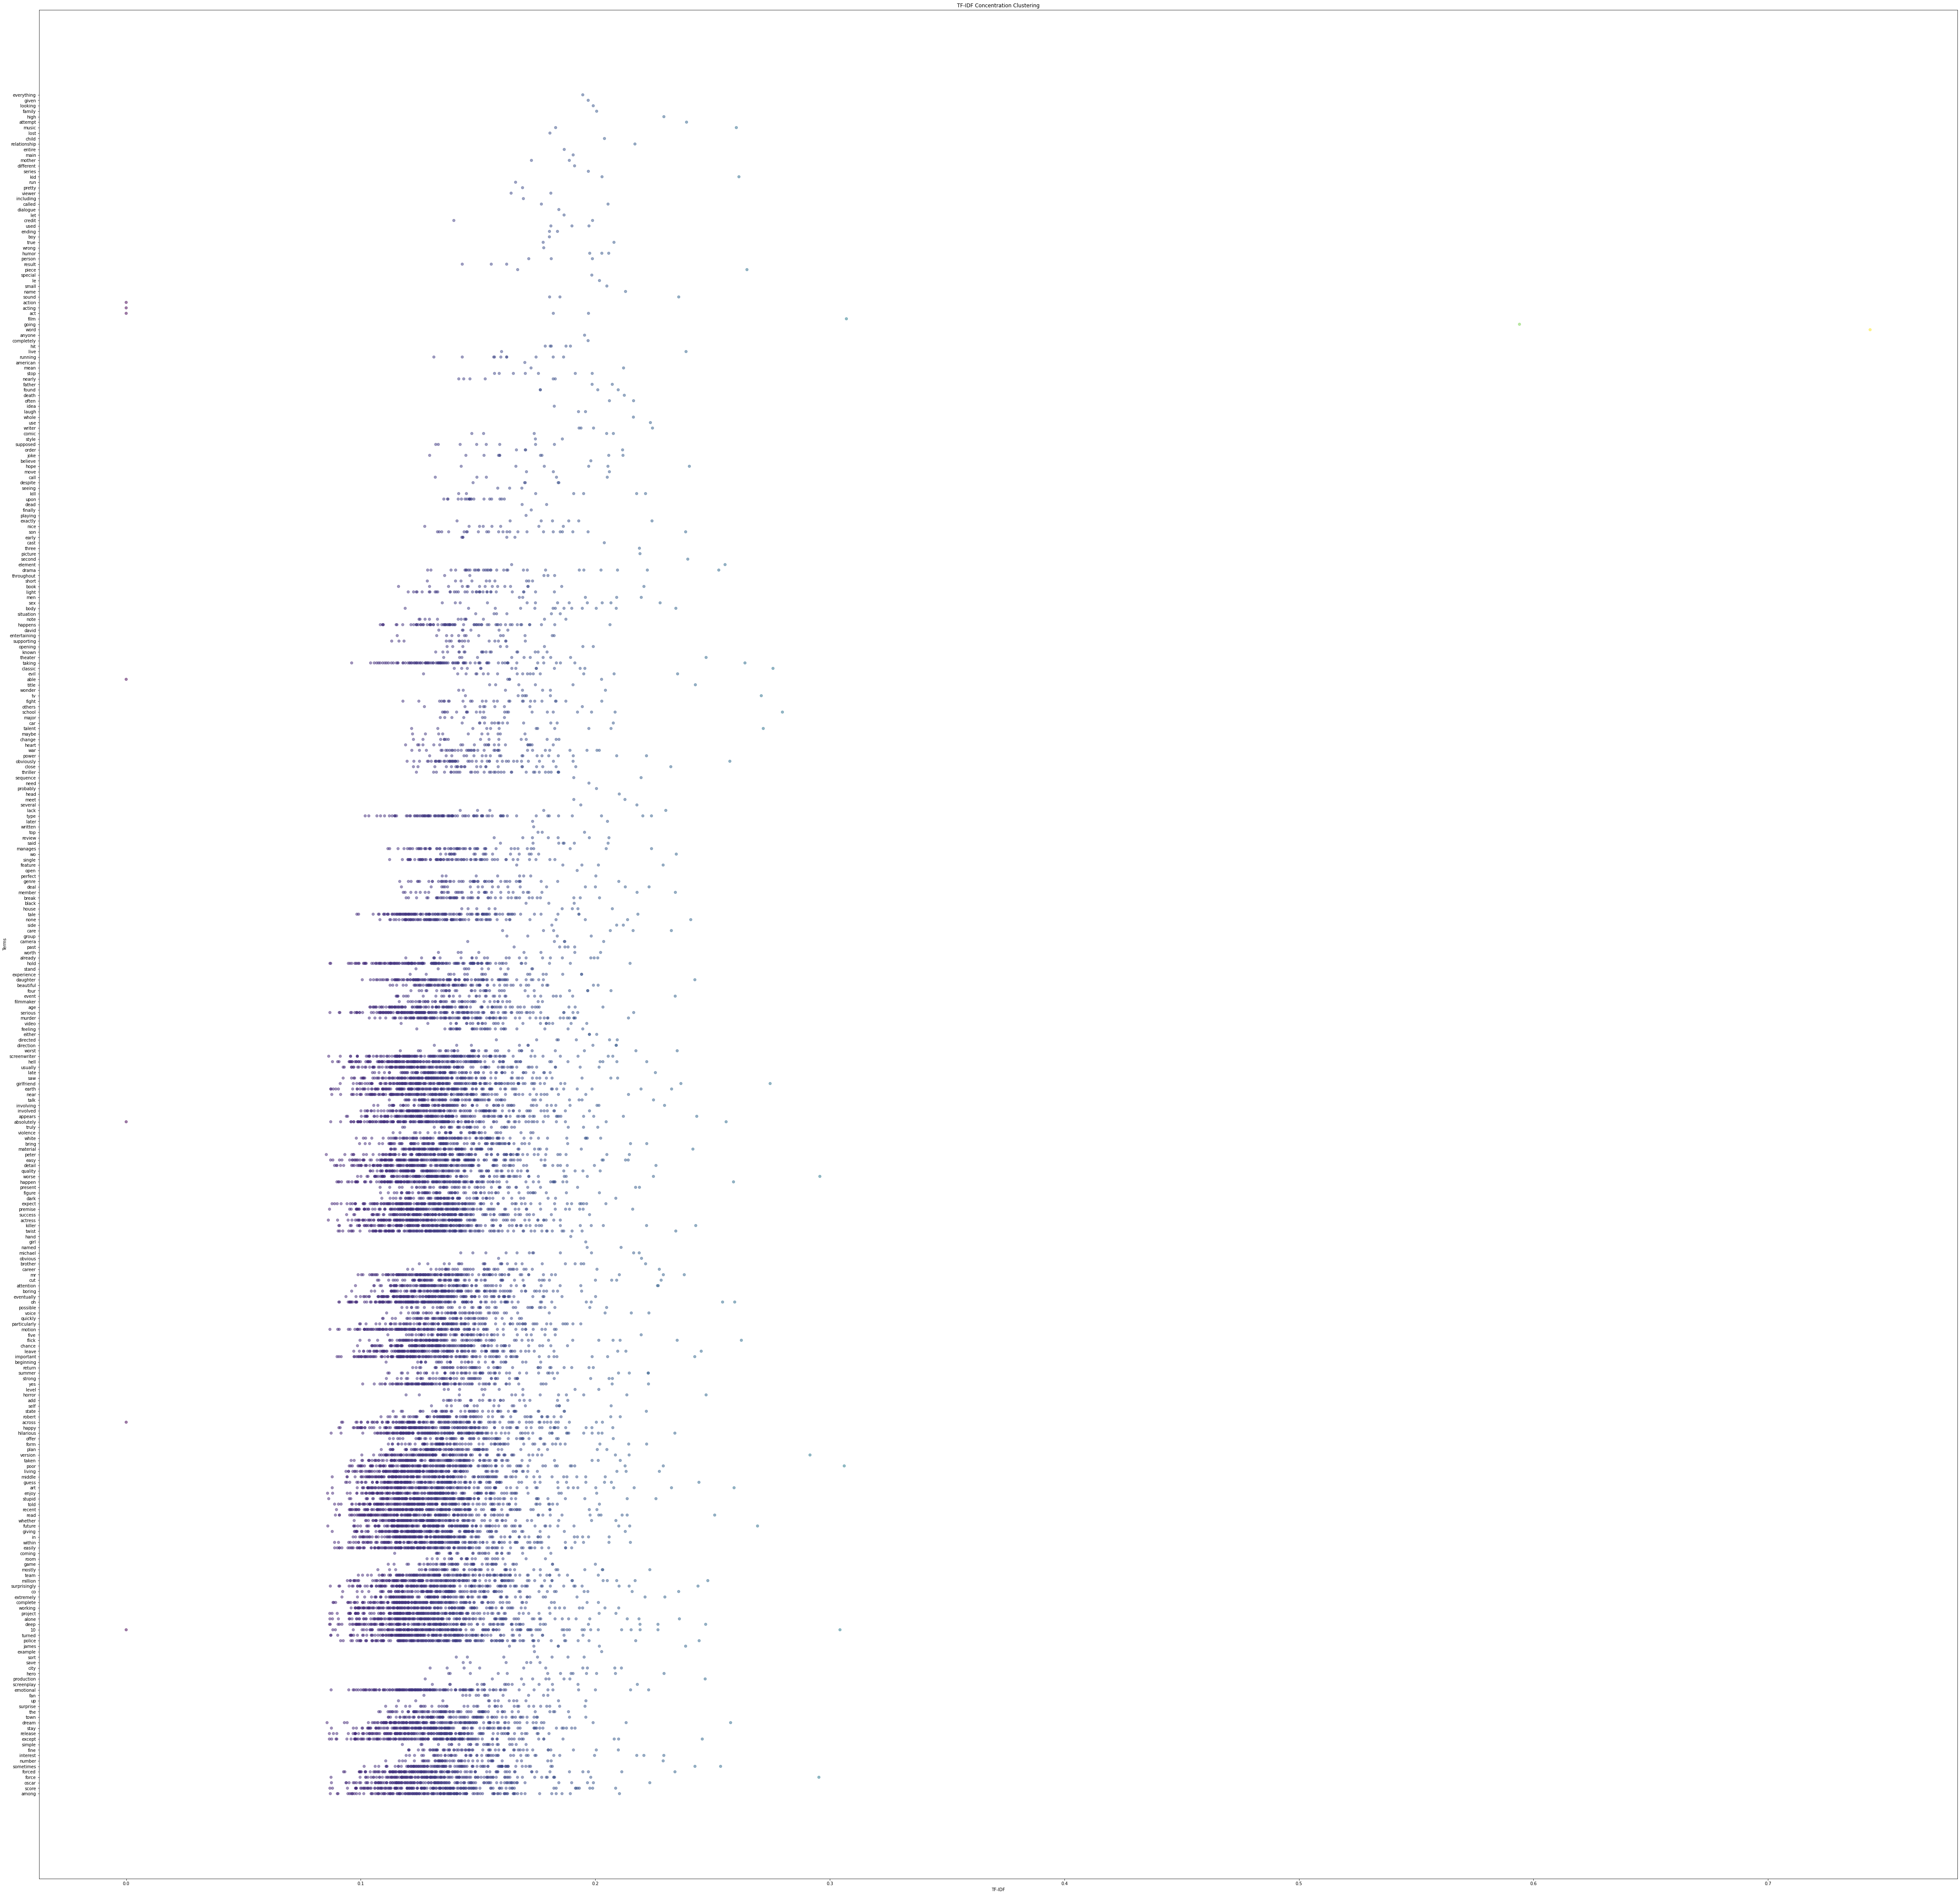

In [68]:
tfidf = []
terms = []

# Gathering each tfidf value
for tfidf_value in top_tfidf['tfidf']:
  tfidf.append(tfidf_value)

# Gathering each term
for term in top_tfidf['term']:
  terms.append(term)

print(len(tfidf))
print(len(terms))


X = tfidf
Y = terms
colors = tfidf


plt.figure(figsize=(80,80))
plt.scatter(X, Y, c=colors, alpha=0.5)
plt.title('TF-IDF Concentration Clustering')
plt.xlabel('TF-IDF')
plt.ylabel('Terms')
plt.show()

**As you can see, each word has a certain weight to it. It's weight is determined by how frequent it appears in the entire document. Therefore, the lower the weight, the less unique it is to the document(the more often it appears). In the scatter plot, you see that the majority of terms appeared in the TF-IDF range of 0.1 to 0.2 to rarely above 0.3. This shows that there are a lot of repetitive terms that appeared in multiple documents**.

# Part 2: Perform AI Natural Language Inference

# After we performed Vectorisation and TF-IDF, now it is ready to get fitted into the model. To do that, we convert the X_train, y_train, X_test, y_test into arrays.

In [69]:
# The following codes in this cell are provided as a guide
import numpy as np

X_train = train_data_features.toarray()
y_train = np.array(train_targets.copy())
X_test = test_data_features.toarray()
y_test = np.array(test_targets.copy())

In [70]:
print(f'(Preview of X_train): \n\n{X_train}')
print('\n\n\n')
print(f'(Preview of X_test): \n\n{X_test}')
print('\n\n\n')
print(f'(Preview of y_train): \n\n{y_train}')
print('\n\n\n')
print(f'(Preview of y_test): \n\n{y_test}')

(Preview of X_train): 

[[0.         0.         0.         ... 0.         0.07718263 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]




(Preview of X_test): 

[[0.         0.0860402  0.         ... 0.         0.         0.07014124]
 [0.         0.         0.         ... 0.         0.08571098 0.08355489]
 [0.         0.         0.         ... 0.         0.         0.10089671]
 ...
 [0.         0.08782063 0.         ... 0.         0.         0.        ]
 [0.10278579 0.         0.         ... 0.         0.07464346 0.        ]
 [0.         0.         0.         ... 0.         0.06797639 0.        ]]




(Preview of y_train): 

[1 0 1 ... 0 1 1]




(Preview of

# Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
dummy_y_train = np_utils.to_categorical(y_train, dtype='int8')

y_test = lb.fit_transform(y_test)
dummy_y_test = np_utils.to_categorical(y_test, dtype='int8')

print(dummy_y_train)

[[0 1]
 [1 0]
 [0 1]
 ...
 [1 0]
 [0 1]
 [0 1]]


In [72]:
print(f'{dummy_y_train.shape[0]} rows & {dummy_y_train.shape[1]} columns')
print(f'{dummy_y_test.shape[0]} rows & {dummy_y_test.shape[1]} columns')

1600 rows & 2 columns
400 rows & 2 columns


In [73]:
dummy_y_train[0]

array([0, 1], dtype=int8)

In [74]:
np.unique(dummy_y_train[:,1], return_counts=True)

(array([0, 1], dtype=int8), array([799, 801]))

In [75]:
dummy_y_test[:10]

array([[0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1]], dtype=int8)

In [76]:
print(f'{X_train.shape} : {type(X_train)}')
print(f'{dummy_y_train.shape} : {type(dummy_y_train)}')
print(f'{X_test.shape} : {type(X_test)}')
print(f'{dummy_y_test.shape} : {type(dummy_y_test)}')

(1600, 500) : <class 'numpy.ndarray'>
(1600, 2) : <class 'numpy.ndarray'>
(400, 500) : <class 'numpy.ndarray'>
(400, 2) : <class 'numpy.ndarray'>


## Task 5: Create Model Using Neural Networks

Create a suitable neural network and train it. 
Found a Neural Network to perform better than a Convolutional Neural in this case. 



> **Note that the original creator of this model and and the train_model function is authentic from this colab notebook.**





In [77]:
from keras.models import Sequential, load_model
from keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Dense
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


##Complete the code below
model = Sequential()
model.add(Dense(units=64, activation='sigmoid', input_dim=500))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                32064     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 32,194
Trainable params: 32,194
Non-trainable params: 0
_________________________________________________________________


In [78]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):
    
    # Optimizers
    opt_adam = Adam(learning_rate = 0.001)
    opt_SGD = SGD(learning_rate = 0.001)
   
    # Callbacks
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint(save_to + 'SAM.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
    
    
    model.compile(optimizer=opt_adam,
              loss=['binary_crossentropy'],
              metrics=['accuracy'])
    
    
    history = model.fit(x_train,y_train,
                    batch_size=20,
                    epochs=epoch,
                    validation_data=(x_test,y_test),
                    callbacks=[es,mc,lr_schedule]
                    )
    
    
    saved_model = load_model(save_to + 'SAM.h5')
    
    return saved_model, history

In [79]:
save_to_path = '/content/drive/MyDrive/ITE/NLP/Project/Model/'
saved_model, H = train_model(model, x_train=X_train, y_train=dummy_y_train, x_test=X_test, y_test=dummy_y_test, save_to=save_to_path, epoch=100)

Epoch 1/100
65/80 [=======================>......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5400
Epoch 1: val_accuracy improved from -inf to 0.51500, saving model to /content/drive/MyDrive/ITE/NLP/Project/Model/SAM.h5
80/80 [==============================] - 1s 5ms/step - loss: 0.6901 - accuracy: 0.5362 - val_loss: 0.6826 - val_accuracy: 0.5150 - lr: 0.0010
Epoch 2/100
73/80 [==========================>...] - ETA: 0s - loss: 0.6738 - accuracy: 0.6699
Epoch 2: val_accuracy improved from 0.51500 to 0.72750, saving model to /content/drive/MyDrive/ITE/NLP/Project/Model/SAM.h5
80/80 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.6712 - val_loss: 0.6702 - val_accuracy: 0.7275 - lr: 9.0484e-04
Epoch 3/100
78/80 [============================>.] - ETA: 0s - loss: 0.6590 - accuracy: 0.7827
Epoch 3: val_accuracy improved from 0.72750 to 0.73500, saving model to /content/drive/MyDrive/ITE/NLP/Project/Model/SAM.h5
80/80 [==============================] - 0s 3ms/step - los

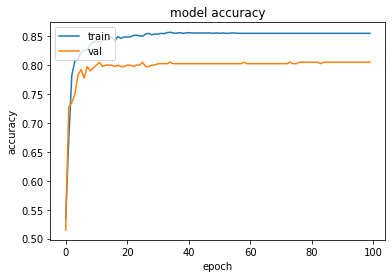

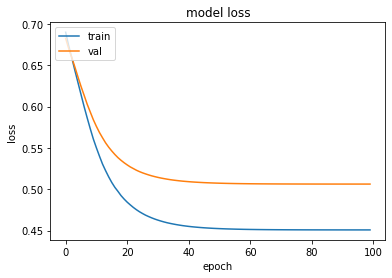

In [80]:
import matplotlib.pyplot as plt

def Stats():
  plt.plot(H.history['accuracy'])
  plt.plot(H.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(H.history['loss'])
  plt.plot(H.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  
Stats()


# Evaluation

In [81]:
model_acc = model.evaluate(X_test, dummy_y_test, verbose=0)[1]
print('Test Accuracy: {:.3f}%'.format(model_acc * 100))

Test Accuracy: 80.500%


# Confusion Matrix & Classification Report

13/13 [==============================] - 0s 1ms/step




Classification Report: 
-------------------------------------
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       201
           1       0.80      0.80      0.80       199

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400







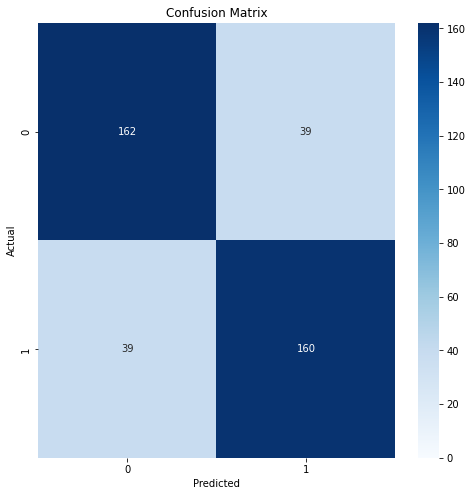

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
 
predicted = model.predict(X_test)
predicted_label=[np.argmax(each) for each in np.array(predicted)]
y_test_label=[np.argmax(each) for each in np.array(dummy_y_test)]

cm = confusion_matrix(y_test_label, predicted_label)
clr = classification_report(y_test_label, predicted_label)
print('\n')
print('\n')
print('Classification Report: \n-------------------------------------\n', clr)
print('\n')
print('\n')
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Task 6: Test For Unseen Text

Use the trained model to make predictions on totally unseen text. 

In [83]:
from tqdm.notebook import tqdm
from time import sleep

In [84]:
#use the following text for prediction
neg_text="Just when you think you’ve seen the worst movie ever made,\
along comes this pile of toxic waste."

pos_text='This is going to go down as one of 2022’s most entertaining motion pictures.'

In [85]:
def test_model(pos_text,neg_text,model):
  #processed_NewText_Lst = []

  for text in [pos_text, neg_text]:
    processed_NewText = process_text(text)
    #processed_NewText_Lst.append(processed_NewText)
    #print(processed_NewText)

    
    print("\nNew Text To Predict:\n","\""+text+"\"")
    text_to_predict = vectorizer.transform([' '.join(x) for x in [processed_NewText]])
    feature_names = vectorizer.get_feature_names_out()
    
    # Convert to array before prediction
    To_array = text_to_predict.toarray()
   
    
    result = model.predict(To_array)
    #print(result)
    
    
    result = [np.argmax(each) for each in np.array(result)]
   
    # Check condition
    if result == [0]:
      for i in tqdm(range(100)):
        sleep(0.01)
      print()
      print("Predicted Sentiment: NEGATIVE")
    else:
      for i in tqdm(range(100)):
        sleep(0.01)
      print()
      print("Predicted Sentiment: POSITIVE")

test_model(pos_text,neg_text,model)


New Text To Predict:
 "This is going to go down as one of 2022’s most entertaining motion pictures."
1/1 [==============================] - 0s 15ms/step


  0%|          | 0/100 [00:00<?, ?it/s]


Predicted Sentiment: POSITIVE

New Text To Predict:
 "Just when you think you’ve seen the worst movie ever made,along comes this pile of toxic waste."
1/1 [==============================] - 0s 15ms/step


  0%|          | 0/100 [00:00<?, ?it/s]


Predicted Sentiment: NEGATIVE


## Task 7: Apply Cosine Similarity To Find Similar Texts

Based on the given unseen positive and negative text previously, find the top most similar sentences from the training dataset. 

Reminder: Please note that you have to use the same fitted "tfidf" model to perform feature extraction of your texts. 

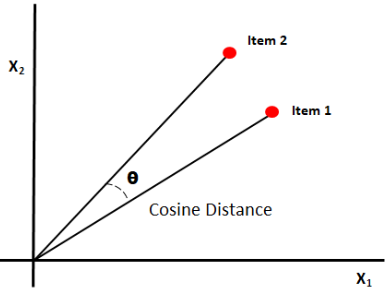

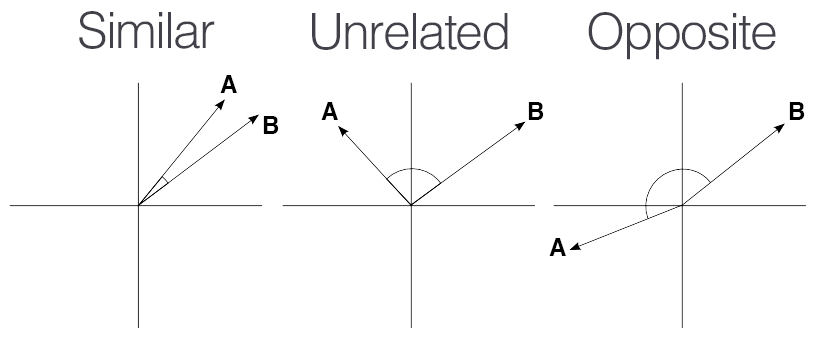

In the mathematical analogy of cosine similarity, it is calculate based on the degree of angle point ***A*** & ***B***. The closer the angles are to each other, the more similar the vectors are and the higher the cosine similarity. This degree of measure is computed within a score range of 0 to 1, using **sklearn.metrics.pairwise.cosinesimilarity**. In the case, we are trying to compare the similarity between the given negative and positive texts against the features in our training data and retrieve words with similar meaning. The reason I chose to compute the cosine similarity word to word was because there were semantic meanings in the text that made feature engineering difficult, it is easy for us to look at the sentence as a whole, but not likewise for the model. So to counter this issue, I break paragraphs to sentences, sentences to words, words to vectors and vectors to TF-IDF. Once the TF-IDF values were obtained, I computed the cosine similarity for each word in the unseen texts against each word(vocab/terms) in the training dataset. Then I sort the values from the largest to smallest and display the relevant word for the top cosine similarity values.

In [86]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
%matplotlib inline

neg_text="Just when you think you’ve seen the worst movie ever made,\
along comes this pile of toxic waste."

pos_text='This is going to go down as one of 2022’s most entertaining motion pictures.'

def findSimiarlTextModel(pos_text,neg_text,model):
  # Get tfidf values set1 from unseen texts(positive)
  for text in [pos_text]:
    c1 = process_text(text)
    tfidf_pos_text = vectorizer.transform([' '.join(x) for x in [c1]])
  

  # Get tfidf values set2 from unseen texts(negative)
  for text in [neg_text]:
    c2 = process_text(text)
    tfidf_neg_text = vectorizer.transform([' '.join(x) for x in [c2]])

     
  # Our vectorizer has already been borned in the TFIDF function
  # so there is no need to re-initialised it again, however we can 
  # do transform on c1s & c2s to find the tfidf values of each
  # and do a cosine similarity comparsion against the train data
  # features that our model was trained on previously.
    
  # Cosine Similarity | The higher the score, the closer 
  # Checking the cosine similarity between the negative text and positive text.
  # logically speaking score should be low because there should not be any similar meanings 

  """
  cs_pos_neg = cosine_similarity(c1s, c2s)
  print(f'Cosine Similarity between positive tfidf and negative text tfidf:\n{cs_pos_neg}')
  print('\n')"""

  
  
  # Counters
  count_pos = 0
  count_neg = 0
  
  # Terms
  term_names = list(df_trainvect.columns)

  # store cosine similarity
  cs_pos_lst = []
  cs_neg_lst = []


  # iterate through each tf-idf value
  for tfidf_value in train_data_features:
    # Compute cosine similarity between the positive text tf-idf and the tf-idf in training set
    cs_pos = cosine_similarity(tfidf_pos_text, tfidf_value)
    count_pos += 1
    cs_pos_lst.append(str(cs_pos[0][0]))
    # Compute cosine similarity between the negative text tf-idf and the tf-idf in training set
    cs_neg = cosine_similarity(tfidf_neg_text, tfidf_value)
    count_neg += 1
    cs_neg_lst.append(str(cs_neg[0][0]))

                       #0            #1          #2
  Results = list(zip(term_names, cs_pos_lst, cs_neg_lst))


  # Here we want to sort the dict by the highest tfidf values just to make sure values are in descending order
  sorted_cs_pos = sorted(Results, key=lambda x: x[1], reverse=True) # sorting by index[1] = numeric value
  sorted_cs_neg = sorted(Results, key=lambda x: x[2], reverse=True) # sorting by index[2] = numeric value


  Results_pos = []
  Results_neg = []

  for tup in sorted_cs_pos:
    lst_tup = list(tup)
    Results_pos.append(lst_tup[:-1])

  for tup in sorted_cs_neg:
    lst_tup = list(tup)
    Results_neg.append(lst_tup[::2])

  Results_pos_df = pd.DataFrame(Results_pos, columns = ['Similar words', 'Cosine Similarity'])
  
  Results_neg_df = pd.DataFrame(Results_neg, columns = ['Similar words', 'Cosine Similarity'])
  
  return Results_pos_df, Results_neg_df

Results_pos_df, Results_neg_df = findSimiarlTextModel(pos_text,neg_text,model)


In [87]:
print('Similar words for positive text:')
display(Results_pos_df)
print('\n\n')

Similar words for positive text:


,Similar words,Cosine Similarity
0,several,0.26121273222675995
1,nice,0.17099611612487206
2,beginning,0.16436803502996014
3,mean,0.16434677982006513
4,show,0.16399003084068903
...,...,...
495,script,0.0
496,small,0.0
497,talk,0.0
498,throughout,0.0


In [88]:
print('Similar words for negative text:')
display(Results_neg_df)

Similar words for negative text:


,Similar words,Cosine Similarity
0,come,0.2535885476337849
1,turn,0.22630730810113545
2,screenwriter,0.2120569879127968
3,think,0.2087952832181084
4,violence,0.19622243100038428
...,...,...
495,need,0.0
496,running,0.0
497,town,0.0
498,war,0.0


---

**End of Project**

---

# **©** **Kenneth Foo. All rights reserved**